In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time


In [2]:
datafrm = pd.read_csv('Data file.csv')
datafrm.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [3]:
datafrm.shape

(209593, 37)

In [4]:
datafrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
datafrm.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

In [6]:
datafrm.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Unnamed: 0                 AxesSubplot(0.125,0.826831;0.227941x0.053169)
label                   AxesSubplot(0.398529,0.826831;0.227941x0.053169)
aon                     AxesSubplot(0.672059,0.826831;0.227941x0.053169)
daily_decr30               AxesSubplot(0.125,0.763028;0.227941x0.053169)
daily_decr90            AxesSubplot(0.398529,0.763028;0.227941x0.053169)
rental30                AxesSubplot(0.672059,0.763028;0.227941x0.053169)
rental90                   AxesSubplot(0.125,0.699225;0.227941x0.053169)
last_rech_date_ma       AxesSubplot(0.398529,0.699225;0.227941x0.053169)
last_rech_date_da       AxesSubplot(0.672059,0.699225;0.227941x0.053169)
last_rech_amt_ma           AxesSubplot(0.125,0.635423;0.227941x0.053169)
cnt_ma_rech30           AxesSubplot(0.398529,0.635423;0.227941x0.053169)
fr_ma_rech30            AxesSubplot(0.672059,0.635423;0.227941x0.053169)
sumamnt_ma_rech30           AxesSubplot(0.125,0.57162;0.227941x0.053169)
medianamnt_ma_rech30     AxesSubplot(0.398529,0.571

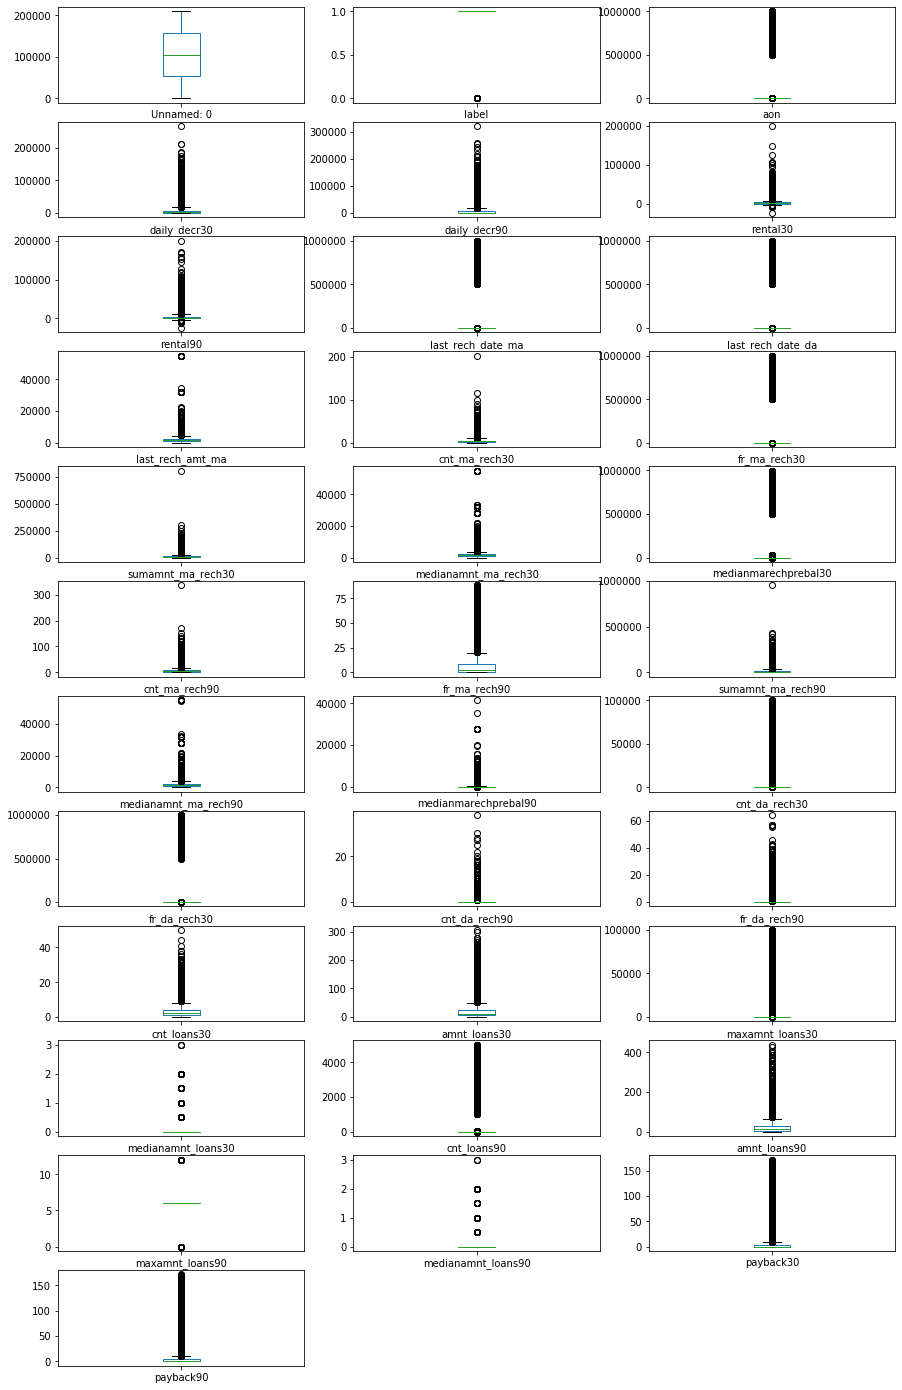

In [7]:
datafrm.plot(kind='box',subplots=True,layout=(12,3),figsize=(15,25))

In [8]:
pd.crosstab(datafrm.label,datafrm.aon)

aon    -48.000000      -47.000000      -46.000000      -45.000000      \
label                                                                   
0                  12              14              15               4   
1                 120              70              77              17   

aon    -44.000000      -43.000000      -42.000000      -41.000000      \
label                                                                   
0                  13              12              14              14   
1                  41              63              40              31   

aon    -40.000000      -39.000000      ...   997608.519509   997797.279619  \
label                                  ...                                   
0                  15              12  ...               0               0   
1                  38              24  ...               1               1   

aon     997897.531721   998013.356235   998995.927512   999190.832139  \
label                                                                   
0                   0               0               0               0   
1                   1               1               1               1   

aon     999215.597054   999391.307123   999520.609388   999860.755168  
label                                                                  
0                   0               0               0               0  
1                   1               1               1               1  

[2 rows x 4507 columns]

In [9]:
datafrm=datafrm.drop(["msisdn","pcircle","pdate"],axis = 1)

In [10]:
datafrm

Unnamed: 0  label     aon  daily_decr30  daily_decr90  rental30  \
0                1      0   272.0   3055.050000   3065.150000    220.13   
1                2      1   712.0  12122.000000  12124.750000   3691.26   
2                3      1   535.0   1398.000000   1398.000000    900.13   
3                4      1   241.0     21.228000     21.228000    159.42   
4                5      1   947.0    150.619333    150.619333   1098.90   
...            ...    ...     ...           ...           ...       ...   
209588      209589      1   404.0    151.872333    151.872333   1089.19   
209589      209590      1  1075.0     36.936000     36.936000   1728.36   
209590      209591      1  1013.0  11843.111667  11904.350000   5861.83   
209591      209592      1  1732.0  12488.228333  12574.370000    411.83   
209592      209593      1  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0                 2            12              6.0                 0.0   
1                 1            12             12.0                 0.0   
2                 1             6              6.0                 0.0   
3                 2            12              6.0                 0.0   
4                 7            42              6.0                 0.0   
...             ...           ...              ...                 ...   
209588            2            12              6.0                 0.0   
209589            3            18              6.0                 0.0   
209590            4            42             12.0                 0.0   
209591            2            18             12.0                 0.0   
209592            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0.000000  10.500000  
209592   0.0000

In [11]:
from scipy.stats import boxcox,zscore

z = np.abs(zscore(datafrm))

threshold = 3


In [12]:
datafrm = datafrm[(z<3).all(axis=1)]

In [13]:
datafrm.shape

(161465, 34)

In [14]:
y=datafrm.label

In [15]:
dfx=datafrm.iloc[:,2:]

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x

aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.753989     -0.126467     -0.169679 -0.644046 -0.635286   
1       0.132221      1.475220      1.235024  0.622504  0.338713   
2      -0.224277     -0.419187     -0.428173 -0.395927 -0.453609   
3      -0.816426     -0.662396     -0.641644 -0.666198 -0.663875   
4       0.605537     -0.639539     -0.621581 -0.323399 -0.397184   
...          ...           ...           ...       ...       ...   
161460 -0.488126     -0.639317     -0.621387 -0.326942 -0.399940   
161461  0.863344     -0.659621     -0.639208 -0.093721 -0.218498   
161462  0.738469      1.425954      1.200850  1.414504  1.815393   
161463  2.186615      1.539915      1.304738 -0.574098 -0.429636   
161464  1.882484      0.126905      0.058195 -0.547794 -0.529950   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0               -0.411410          -0.119438         -0.129929      -0.468416   
1                1.463090          -0.119438          2.235934      -0.792341   
2               -0.307271          -0.119438         -0.129929      -0.792341   
3                3.650007          -0.119438         -0.459635      -1.116266   
4               -0.203132          -0.119438          0.298911       1.151207   
...                   ...                ...               ...            ...   
161460          -0.515549          -0.119438          1.267423      -0.144492   
161461          -0.203132          -0.119438         -0.556542       0.179433   
161462          -0.307271          -0.119438         -0.129929       0.503358   
161463          -0.411410           5.687946         -0.556542       0.503358   
161464           0.734118          -0.119438          3.204446      -0.468416   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0           3.116889  ...    -0.271757     -0.324496        -0.022490   
1          -0.718641  ...    -0.796389     -0.324496         0.008528   
2          -0.718641  ...    -0.796389     -0.816438        -0.022490   
3          -0.718641  ...    -0.271757     -0.324496        -0.022490   
4          -0.353352  ...     2.351404      2.135213        -0.022490   
...              ...  ...          ...           ...              ...   
161460     -0.353352  ...    -0.271757     -0.324496        -0.022490   
161461     -0.535997  ...     0.252875      0.167446        -0.022490   
161462      0.742513  ...     0.777508      2.135213         0.008528   
161463      0.011936  ...    -0.271757      0.167446         0.008528   
161464     -0.535997  ...    -0.271757      0.167446         0.008528   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                -0.180636    -0.431731     -0.460004        -0.331915   
1                -0.180636    -0.783344     -0.460004         3.012819   
2                -0.180636    -0.783344     -0.794570        -0.331915   
3                -0.180636    -0.431731     -0.460004        -0.331915   
4                -0.180636     1.326336      1.212825        -0.331915   
...                    ...          ...           ...              ...   
161460           -0.180636    -0.431731     -0.460004        -0.331915   
161461           -0.180636    -0.080118     -0.125439        -0.331915   
161462           -0.180636     0.974722      1.881956         3.012819   
161463           -0.180636    -0.080118      0.209127         3.012819   
161464           -0.180636    -0.431731     -0.125439         3.012819   

        medianamnt_loans90  payback30  payback90  
0                -0.159769   6.238367   5.206904  
1                -0.159769  -0.619352  -0.647060  
2                -0.159769  -0.619352  -0.647060  
3                -0.159769  -0.619352  -0.647060  
4                -0.159769  -0.067581  -0.176051  
...                    ...        ...        ...  
161460           -0.159769  -0.382879  -0.445199  
161461           -0.159769  -0.382879  -0.445199 

aon                        AxesSubplot(0.125,0.826831;0.227941x0.053169)
daily_decr30            AxesSubplot(0.398529,0.826831;0.227941x0.053169)
daily_decr90            AxesSubplot(0.672059,0.826831;0.227941x0.053169)
rental30                   AxesSubplot(0.125,0.763028;0.227941x0.053169)
rental90                AxesSubplot(0.398529,0.763028;0.227941x0.053169)
last_rech_date_ma       AxesSubplot(0.672059,0.763028;0.227941x0.053169)
last_rech_date_da          AxesSubplot(0.125,0.699225;0.227941x0.053169)
last_rech_amt_ma        AxesSubplot(0.398529,0.699225;0.227941x0.053169)
cnt_ma_rech30           AxesSubplot(0.672059,0.699225;0.227941x0.053169)
fr_ma_rech30               AxesSubplot(0.125,0.635423;0.227941x0.053169)
sumamnt_ma_rech30       AxesSubplot(0.398529,0.635423;0.227941x0.053169)
medianamnt_ma_rech30    AxesSubplot(0.672059,0.635423;0.227941x0.053169)
medianmarechprebal30        AxesSubplot(0.125,0.57162;0.227941x0.053169)
cnt_ma_rech90            AxesSubplot(0.398529,0.571

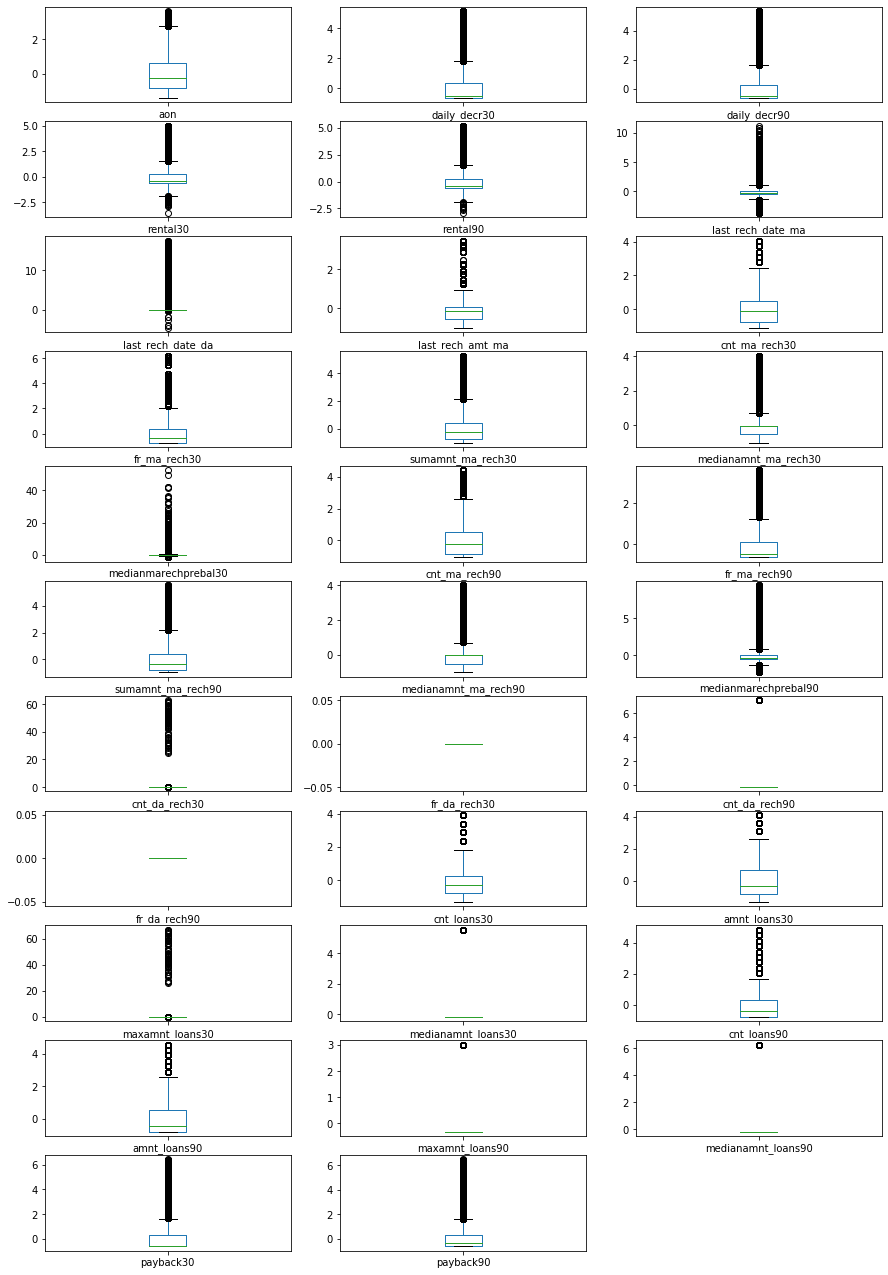

In [17]:
x.plot(kind='box',subplots=True,layout=(12,3),figsize=(15,25))

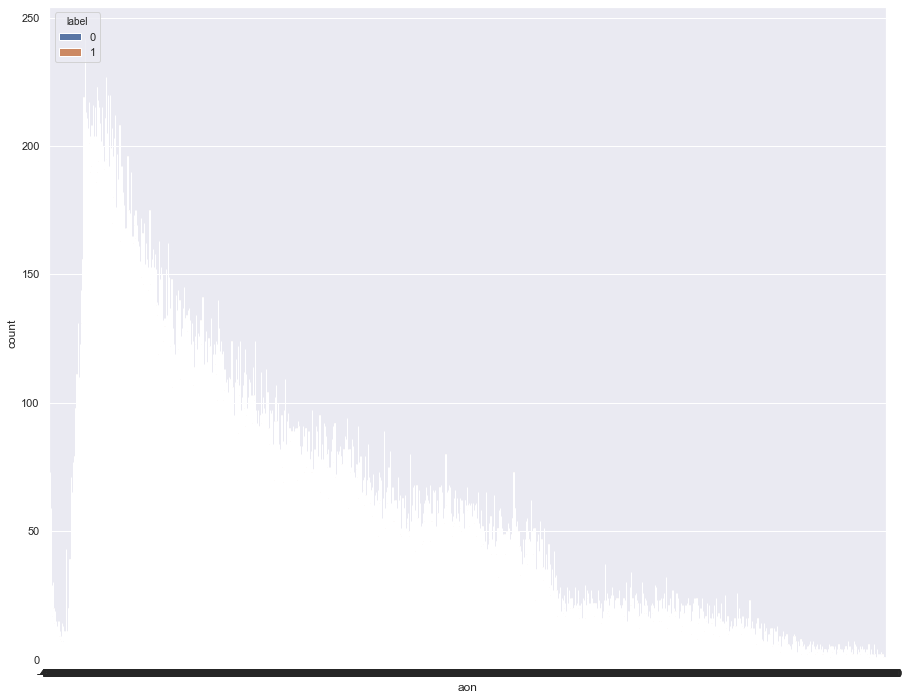

In [33]:
sns.countplot(x=datafrm.aon,hue='label',data=datafrm)

# Classifiaction Algorithms (ignoring KNeighborsClassifier(),SVC() because of time constraints)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')





model_lst=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier()]
#
#,KNeighborsClassifier(),SVC()

def trn_tst_split(model,inpt,outpt,rs=0):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rs)
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    pred_val=model.predict(x_test)
    return accuracy_score(y_test,pred_val)

In [19]:
best_rndm_state=[]
model_name=[]
accurecy_score=[]
cross_val_scr=[]
tme=[]
for algo in model_lst:
    d={}
    a=str(algo)  
    a=a.split('(')[0]
    for i in range(0,10):
        t0 = time()
        scr = trn_tst_split(algo,x,y,i)
        t1 = time()
        duration = round(t1 - t0, ndigits=4)
        
        if scr > 0.50:
            d[i,a]=[scr*100,duration]
        #        if scr > .82:
        #            print (a,'---------',i,'-------',scr)
    random_st = max(d , key=d.get)
    print ('\nRandom_state with Model :',random_st,' Accurecy Score is :',(d[random_st]),'\n')
    best_rndm_state.append(random_st[0])
    model_name.append(random_st[1])
    accurecy_score.append(d[random_st])
    tme.append(d[random_st][1])
    cvs=cross_val_score(algo,x,y,scoring='accuracy',cv=10)
    #print('Scoreing Methode :', i,' Mean of Corss_val_Score :',max(lst)[0],' & Std. Deviation :',max(lst)[1])
    cross_val_scr.append(cvs.mean()*100)
print ('\n')
print('---------------Details of all Classification Algorithms---------------')
result=pd.DataFrame({'Model': model_name,'Best_Random_State':best_rndm_state,'Accuracy_Score':accurecy_score,'Cross_Val_Score':cross_val_scr,'Time':tme})
result


Random_state with Model : (2, 'LogisticRegression')  Accurecy Score is : [86.8082866255845, 2.5894] 


Random_state with Model : (9, 'GaussianNB')  Accurecy Score is : [64.99860650915059, 0.523] 


Random_state with Model : (9, 'DecisionTreeClassifier')  Accurecy Score is : [86.18586071284798, 7.5345] 



---------------Details of all Classification Algorithms---------------


Model  Best_Random_State               Accuracy_Score  \
0      LogisticRegression                  2   [86.8082866255845, 2.5894]   
1              GaussianNB                  9   [64.99860650915059, 0.523]   
2  DecisionTreeClassifier                  9  [86.18586071284798, 7.5345]   

   Cross_Val_Score    Time  
0        86.454651  2.5894  
1        64.581180  0.5230  
2        85.974051  7.5345

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=2)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_val=lr.predict(x_test)
print ('------------LogisticRegression-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val))
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))


------------LogisticRegression-------------
Accurecy Score :  0.868082866255845
Confusion Matrix : [[  439  3951]
 [  309 27594]]
Classification Report :               precision    recall  f1-score   support

           0       0.59      0.10      0.17      4390
           1       0.87      0.99      0.93     27903

    accuracy                           0.87     32293
   macro avg       0.73      0.54      0.55     32293
weighted avg       0.84      0.87      0.83     32293



In [25]:
from sklearn.model_selection import cross_val_score
scor=['precision','recall','f1']

for i in scor:
    lrscore=cross_val_score(lr,x,y,scoring=i,cv=15)
    print(lrscore)
    print(lrscore.mean(),lrscore.std())

print ('----------------------------')
print (lrscore.mean())


[0.87233435 0.86968892 0.87033697 0.87011876 0.87104159 0.87251451
 0.87159015 0.87158756 0.87055477 0.87200684 0.87201139 0.86972199
 0.87070765 0.87165826 0.871537  ]
0.8711607135089431 0.0008941464824813674
[0.98835077 0.98910581 0.98899795 0.98781146 0.98500701 0.98921368
 0.98910581 0.98835077 0.99018445 0.98986086 0.99137094 0.98867436
 0.99007658 0.98824291 0.99083163]
0.9890123323625644 0.001442771216796117
[0.92672566 0.92556144 0.92588105 0.92523742 0.92452544 0.92720655
 0.92663703 0.92630408 0.92652402 0.92720384 0.92786836 0.92539122
 0.92656337 0.92629663 0.92736359]
0.9263526461091857 0.0008728312957630995
----------------------------
0.9263526461091857


In [26]:
y_pred_proba=lr.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
roc_score=roc_auc_score(y_test,y_pred_proba)
roc_score

0.8411633223034207

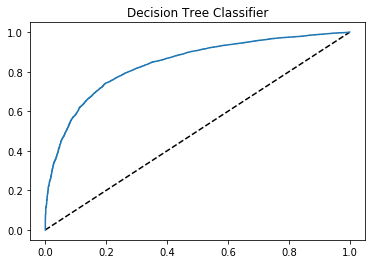

In [27]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel=''
plt.ylabel=''
plt.title('Decision Tree Classifier')
plt.show()

# SVC() algorithm time 

In [40]:
for i in range(0,10):
        t0 = time()
        scr = trn_tst_split(SVC(),x,y,i)
        t1 = time()
        duration = round(t1 - t0, ndigits=4)
        
        if scr > 0.86:
            print(i,'    ',scr,'  ',duration)

0      0.8678970674759235    3412.6503
1      0.868640262595609    2955.4204
2      0.8722943052673954    41260.5589
3      0.8677422351593225    2027.6502
4      0.8690737930820921    2272.648
5      0.8699718205183786    2018.137
6      0.8683305979624067    1396.5557
7      0.8668751741863562    3155.3156
8      0.8683305979624067    3316.0276
9      0.8691357260087326    2617.3931


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=2)
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_val=svc.predict(x_test)
print ('------------LogisticRegression-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val))
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))


------------LogisticRegression-------------
Accurecy Score :  0.8722943052673954
Confusion Matrix : [[  529  3861]
 [  263 27640]]
Classification Report :               precision    recall  f1-score   support

           0       0.67      0.12      0.20      4390
           1       0.88      0.99      0.93     27903

    accuracy                           0.87     32293
   macro avg       0.77      0.56      0.57     32293
weighted avg       0.85      0.87      0.83     32293

